In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set up plotting style
plt.style.use('default')
plt.rcParams['figure.figsize'] = (12, 8)
sns.set_palette("husl")

# Load the data
df = pd.read_csv('/workspaces/ds-fall-2025-wed-JO/Week-03-EDA-and-Dashboards/data/movie_ratings.csv')

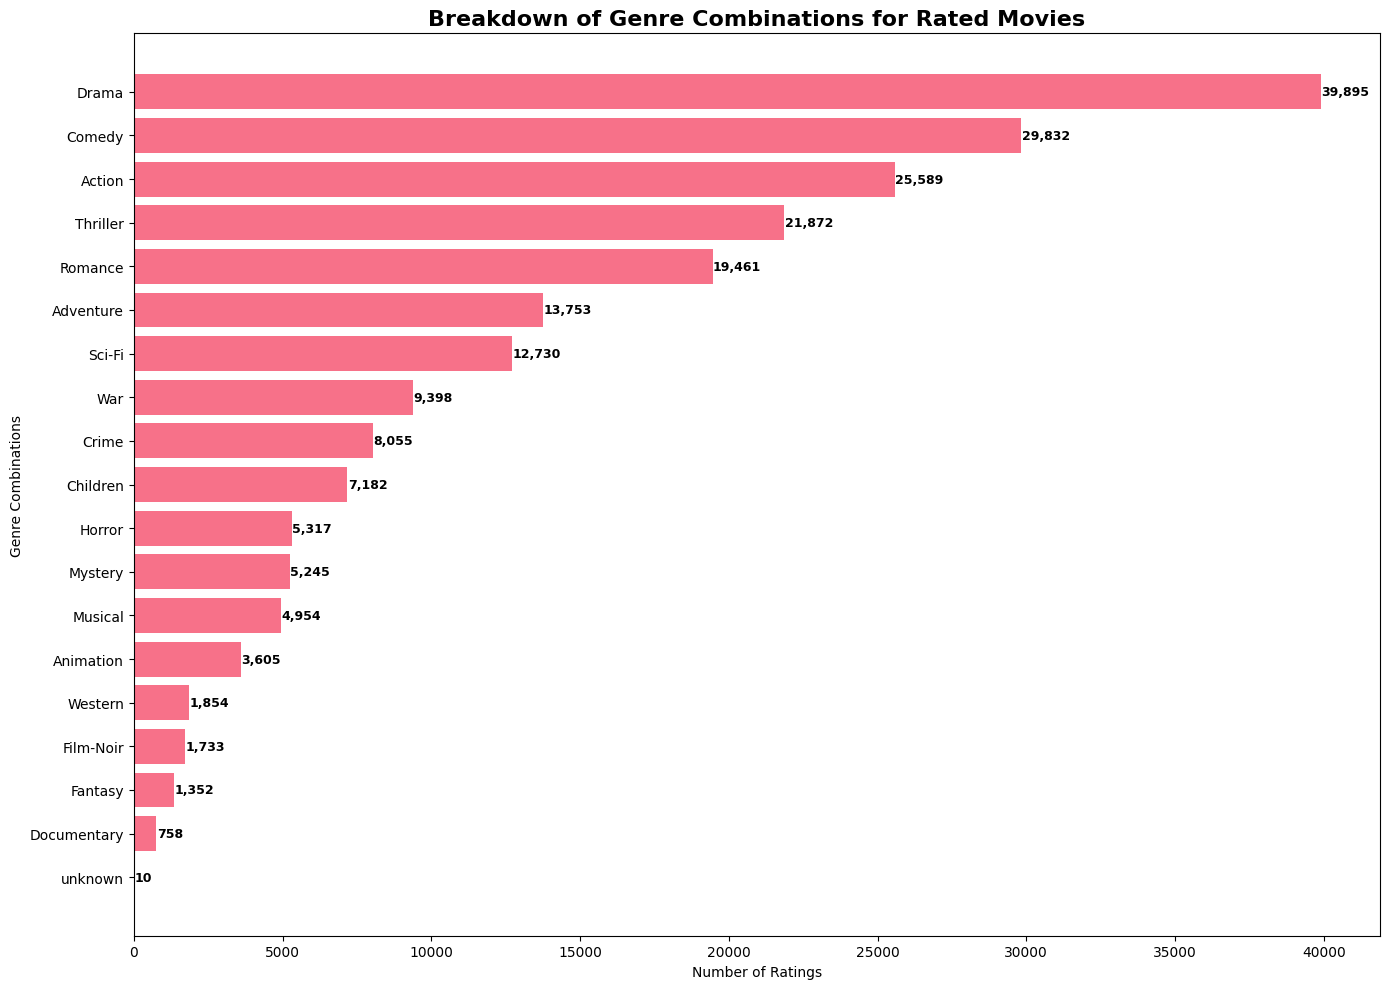

Top 10 Genre Combinations by Number of Ratings:
Drama: 39,895 ratings
Comedy: 29,832 ratings
Action: 25,589 ratings
Thriller: 21,872 ratings
Romance: 19,461 ratings
Adventure: 13,753 ratings
Sci-Fi: 12,730 ratings
War: 9,398 ratings
Crime: 8,055 ratings
Children: 7,182 ratings


In [2]:
# 1. Genre breakdown - using the existing genre column
genre_counts = df['genres'].value_counts()

plt.figure(figsize=(14, 10))
bars = plt.barh(genre_counts.index, genre_counts.values)
plt.xlabel('Number of Ratings')
plt.ylabel('Genre Combinations')
plt.title('Breakdown of Genre Combinations for Rated Movies', fontsize=16, fontweight='bold')
plt.gca().invert_yaxis()

# Add value labels
for i, (genre_combo, count) in enumerate(genre_counts.items()):
    plt.text(count + 10, i, f'{count:,}', va='center', fontweight='bold', fontsize=9)

plt.tight_layout()
plt.show()

print("Top 10 Genre Combinations by Number of Ratings:")
for genre_combo, count in genre_counts.head(10).items():
    print(f"{genre_combo}: {count:,} ratings")

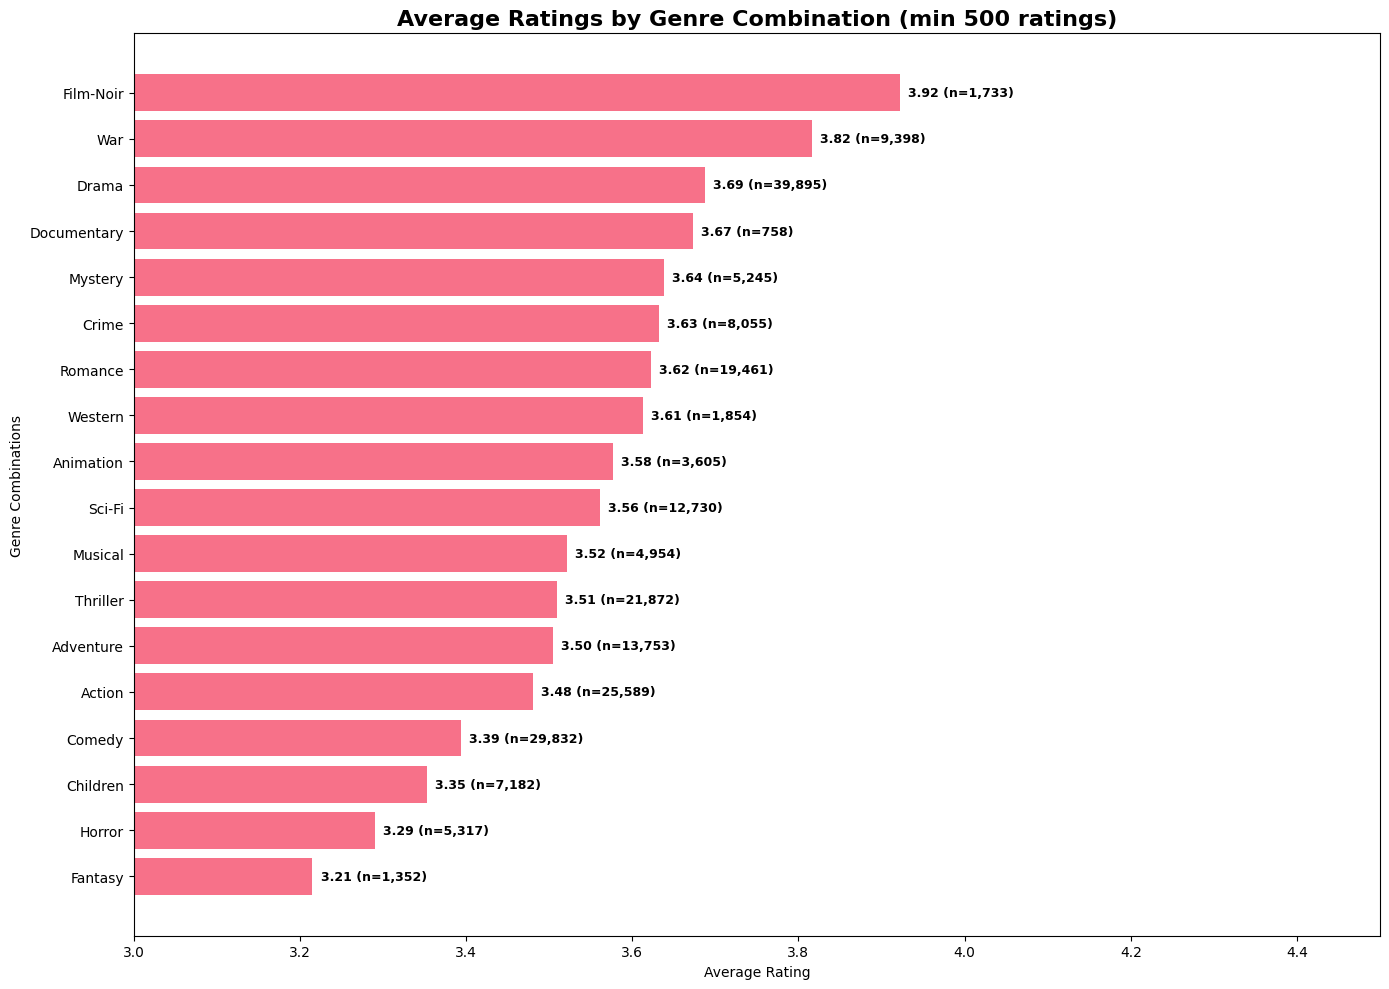

In [3]:
# 2. Highest rated genre combinations (with minimum 500 ratings for significance)
genre_stats = df.groupby('genres').agg({
    'rating': ['mean', 'count']
}).round(3)
genre_stats.columns = ['avg_rating', 'count']

# Filter for significant sample size
genre_stats = genre_stats[genre_stats['count'] >= 500].sort_values('avg_rating', ascending=False)

plt.figure(figsize=(14, 10))
bars = plt.barh(genre_stats.index, genre_stats['avg_rating'])
plt.xlabel('Average Rating')
plt.ylabel('Genre Combinations')
plt.title('Average Ratings by Genre Combination (min 500 ratings)', fontsize=16, fontweight='bold')
plt.xlim(3, 4.5)
plt.gca().invert_yaxis()

# Add value labels
for i, (genre_combo, (rating, count)) in enumerate(genre_stats.iterrows()):
    plt.text(rating + 0.01, i, f'{rating:.2f} (n={int(count):,})', va='center', fontweight='bold', fontsize=9)

plt.tight_layout()
plt.show()

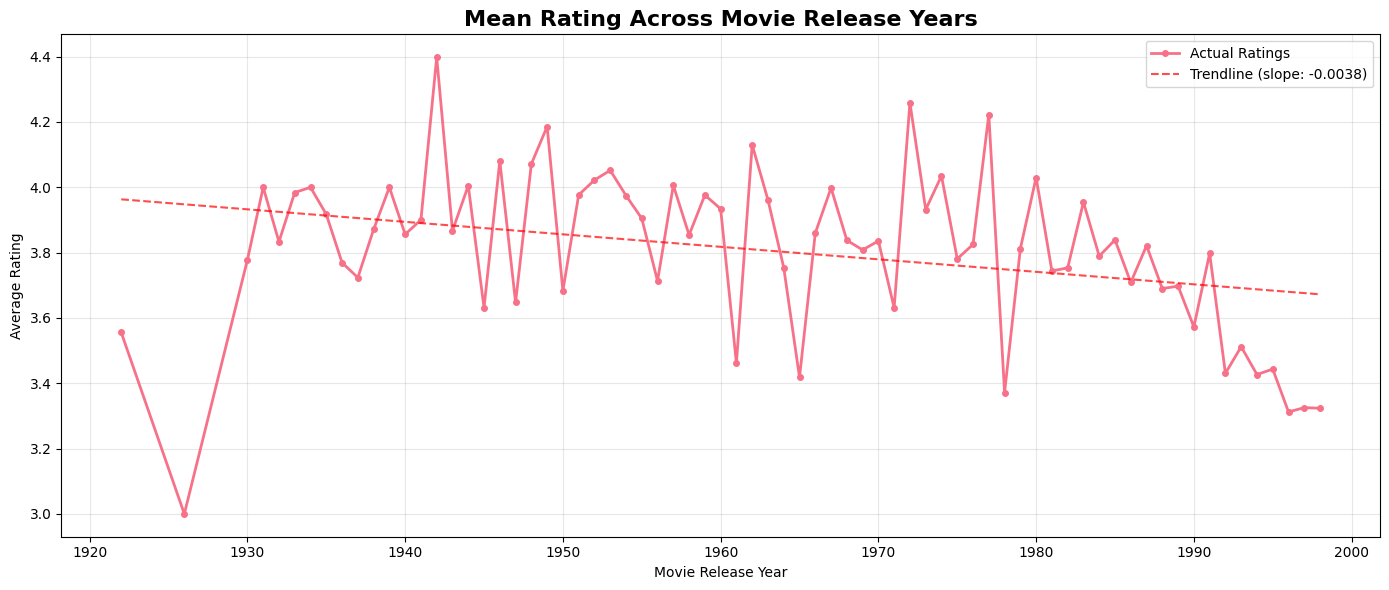

In [4]:
# 3. Mean rating by release year
yearly_ratings = df.groupby('year')['rating'].mean().dropna()

plt.figure(figsize=(14, 6))
plt.plot(yearly_ratings.index, yearly_ratings.values, marker='o', linewidth=2, markersize=4)
plt.xlabel('Movie Release Year')
plt.ylabel('Average Rating')
plt.title('Mean Rating Across Movie Release Years', fontsize=16, fontweight='bold')
plt.grid(True, alpha=0.3)

# Add trend line
z = np.polyfit(yearly_ratings.index, yearly_ratings.values, 1)
p = np.poly1d(z)
plt.plot(yearly_ratings.index, p(yearly_ratings.index), "r--", alpha=0.7)
plt.legend(['Actual Ratings', f'Trendline (slope: {z[0]:.4f})'])

plt.tight_layout()
plt.show()

In [5]:
# 4. Best-rated movies with minimum rating counts
movie_stats = df.groupby('title').agg({
    'rating': ['mean', 'count']
}).round(3)
movie_stats.columns = ['avg_rating', 'rating_count']

# Movies with at least 50 ratings
movies_50 = movie_stats[movie_stats['rating_count'] >= 50]
top_5_50 = movies_50.nlargest(5, 'avg_rating')

# Movies with at least 150 ratings
movies_150 = movie_stats[movie_stats['rating_count'] >= 150]
top_5_150 = movies_150.nlargest(5, 'avg_rating')

print("=" * 80)
print("TOP 5 BEST-RATED MOVIES")
print("=" * 80)

print("\nWith at least 50 ratings:")
print("-" * 40)
for i, (title, (rating, count)) in enumerate(top_5_50.iterrows(), 1):
    print(f"{i}. {title}")
    print(f"   Rating: {rating:.3f} (from {int(count)} ratings)")
    print()

print("\nWith at least 150 ratings:")
print("-" * 40)
for i, (title, (rating, count)) in enumerate(top_5_150.iterrows(), 1):
    print(f"{i}. {title}")
    print(f"   Rating: {rating:.3f} (from {int(count)} ratings)")
    print()

TOP 5 BEST-RATED MOVIES

With at least 50 ratings:
----------------------------------------
1. Close Shave, A (1995)
   Rating: 4.491 (from 336 ratings)

2. Schindler's List (1993)
   Rating: 4.466 (from 596 ratings)

3. Wrong Trousers, The (1993)
   Rating: 4.466 (from 236 ratings)

4. Casablanca (1942)
   Rating: 4.457 (from 729 ratings)

5. Wallace & Gromit: The Best of Aardman Animation (1996)
   Rating: 4.448 (from 67 ratings)


With at least 150 ratings:
----------------------------------------
1. Close Shave, A (1995)
   Rating: 4.491 (from 336 ratings)

2. Schindler's List (1993)
   Rating: 4.466 (from 596 ratings)

3. Wrong Trousers, The (1993)
   Rating: 4.466 (from 236 ratings)

4. Casablanca (1942)
   Rating: 4.457 (from 729 ratings)

5. Shawshank Redemption, The (1994)
   Rating: 4.445 (from 283 ratings)

